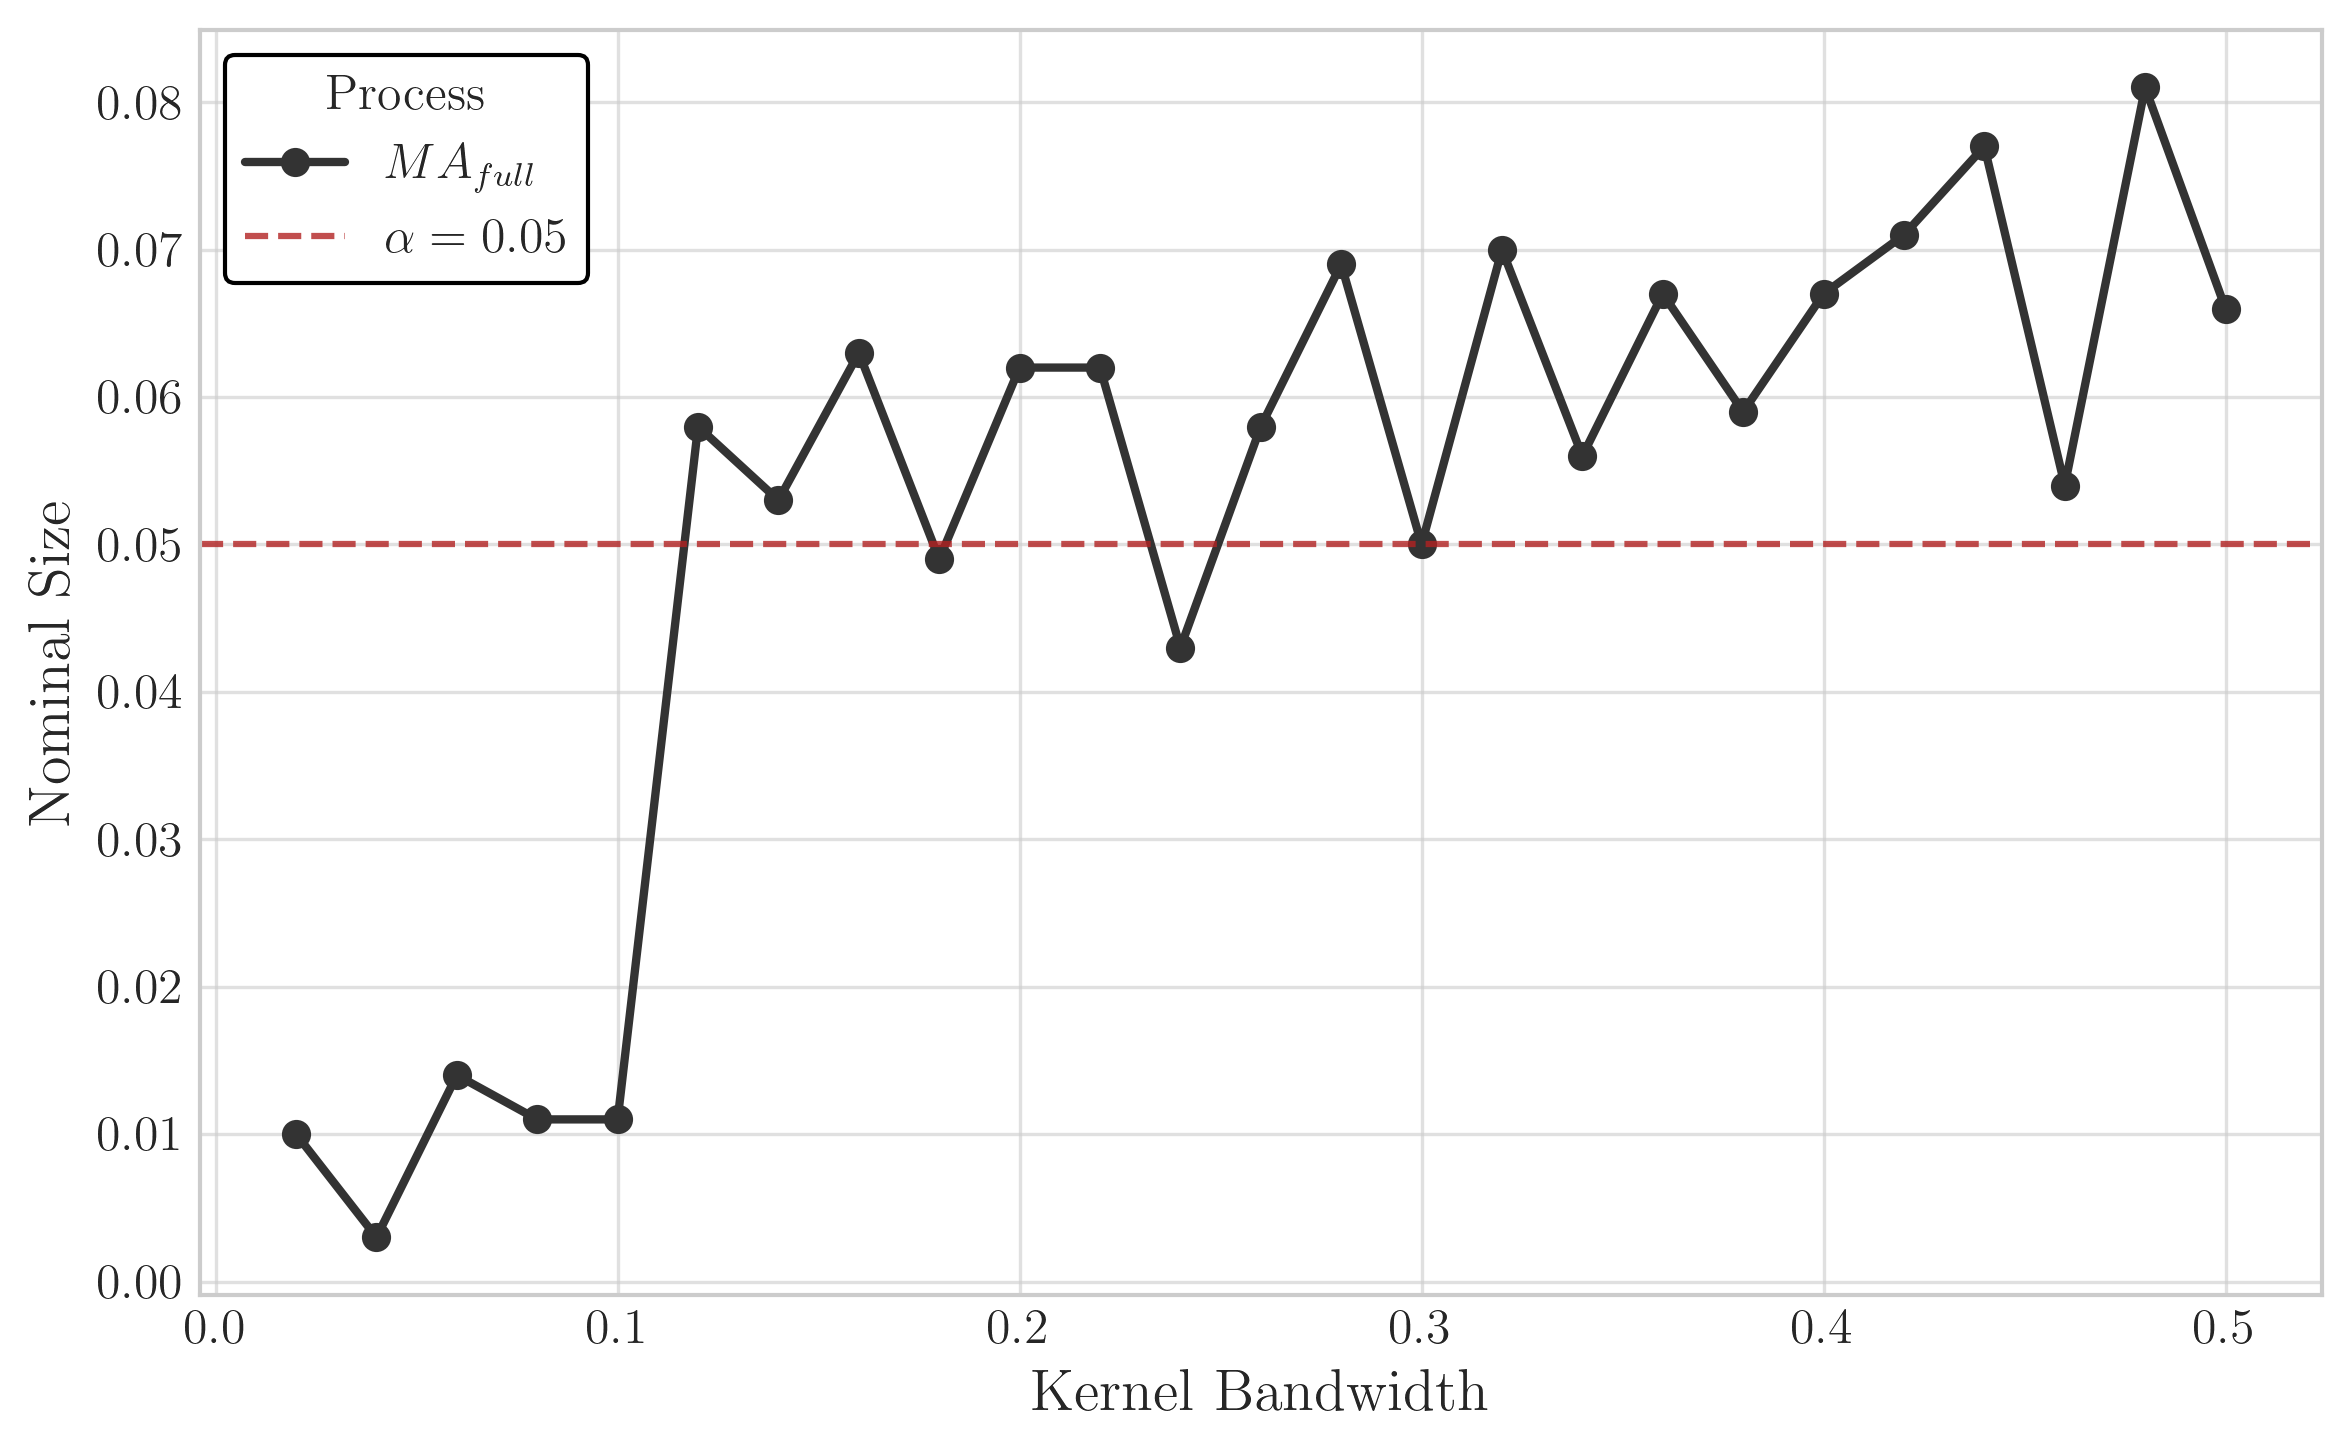

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

WORK_DIR_WOS = "./sim_results/size/with_symmetry"
df_rej_ma = pd.read_csv(f"{WORK_DIR_WOS}/mc_band_stat_MA.csv")
df_rej_ar = pd.read_csv(f"{WORK_DIR_WOS}/mc_band_stat_AR.csv")

rej_ma = df_rej_ma.loc[:, ["h", "decision"]].groupby("h").mean().decision
rej_ar = df_rej_ar.loc[:, ["h", "decision"]].groupby("h").mean().decision

hs = df_rej_ma.h.unique()

# --- 1. Define the Professional Style ---
# Use a cleaner base style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    'axes.labelsize': 14,               # larger axis labels
    'axes.titlesize': 16,               # larger title
    'xtick.labelsize': 12,              # larger tick labels
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (8, 5),           # Standard ratio for papers
    'lines.linewidth': 2.0   
})

# --- 2. Plotting ---
# Use 300 DPI for print quality
fig, ax = plt.subplots(dpi=300)

# Use markers and distinct linestyles for B&W compatibility
ax.plot(hs, rej_ma, label="$MA_{full}$", color='#333333', linestyle='-', marker='o', markersize=6)
ax.plot(hs, rej_ma, label="$AR$", color='#666666', linestyle='--', marker='s', markersize=6)

# --- 3. Refinements ---
# Use axhline for the threshold line (it automatically spans the whole plot)
ax.axhline(y=0.05, color='firebrick', linestyle='--', linewidth=1.5, alpha=0.8, label=r'$\alpha = 0.05$')

# Labels
# ax.set_title("R $H_0$ (N=1000, 20x20 Gitter)", pad=15) # Using LaTeX for H0
ax.set_ylabel("Nominal Size")
ax.set_xlabel("Kernel Bandwidth")

# Grid and Legend
ax.grid(True, which='major', linestyle='-', alpha=0.6)
ax.legend(title="Process", frameon=True, framealpha=1, facecolor='white', edgecolor='black')

# Tight layout handles padding automatically
plt.tight_layout()


plt.show()

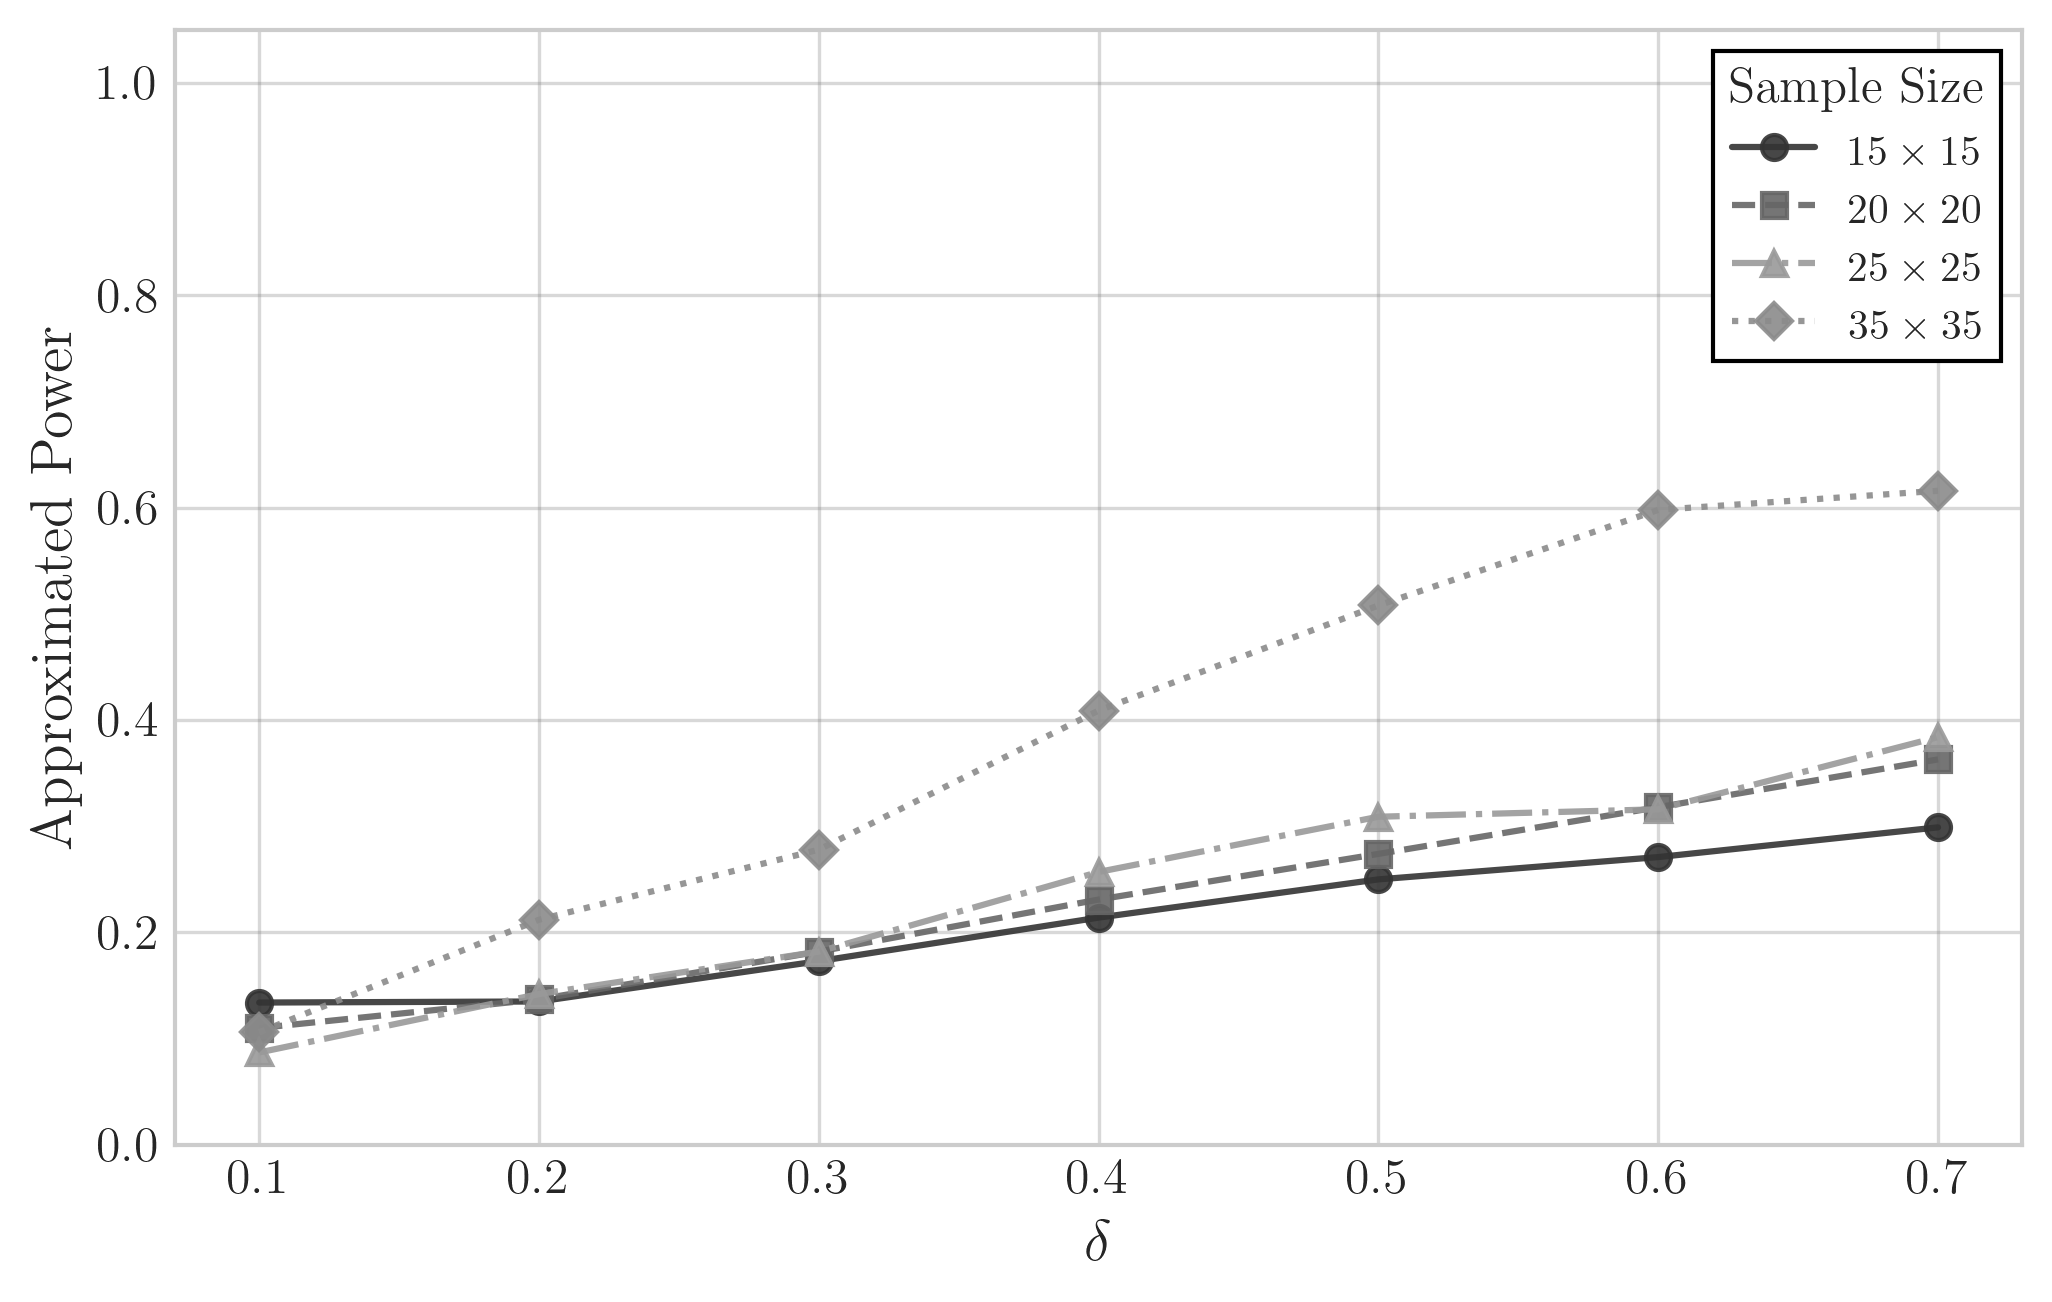

In [13]:
import pandas as pd
from utils import plot_power_result

rej_blur_norm = pd.read_csv("./sim_results/power/mc_stationarity_alt.csv", usecols=["delta", "n", "decision"]).groupby(["n", "delta"]).mean()
rej_blur_norm = rej_blur_norm.reset_index()
plot_power_result(rej_blur_norm)